In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

folder_path = 'D:/Personal/Work/Portfolio/Data Analyst/Datacamp Graduate Project'
file_name = 'product_sales.csv'
file_path = os.path.join(folder_path, file_name)

product_sales = pd.read_csv(file_path)
product_sales.head()
print (product_sales['state'].nunique())

50


In [2]:
# Check NULL values
product_sales.isna().sum()
''' Column "revenue" contains 1074 NULL values '''
product_sales.isna().sum()['revenue']/len(product_sales)
''' NULL > 0.05 times of the dataset --> fill values with median'''
print (product_sales.isna().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [3]:
# Create a copy of the 'sales_methods' column called 'clean_sales_meth' where all data is cleaned
product_sales['clean_sales_meth'] = product_sales['sales_method'].str.capitalize()
product_sales['clean_sales_meth'] = product_sales['clean_sales_meth'].str.replace('Em + call', 'Email + call')

# Column 'nb_sold' is clean (no value < 0, no NULL values)
(product_sales[product_sales['nb_sold'] <= 0])

# Impute revenue column with median values and copy all values to a new column called 'clean_rev'
revenue_dict = product_sales.groupby('clean_sales_meth')['revenue'].median().to_dict()
print (revenue_dict)
product_sales['clean_rev'] = product_sales['revenue'].fillna(product_sales['clean_sales_meth'].map(revenue_dict))
round (product_sales['clean_rev'], 2)
print (product_sales.isna().sum())

# Column 'nb_site_visits' is clean (no value < 0, no NULL values, there are outliers but it's ok)

# Column 'sate' is clean

product_sales_new = product_sales[product_sales['years_as_customer'] < (2025 - 1984)]
'''There are 2 rows with outlier values that are 63 and 47, respectively'''

{'Call': 49.07, 'Email': 95.58, 'Email + call': 184.74}
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
clean_sales_meth        0
clean_rev               0
dtype: int64


'There are 2 rows with outlier values that are 63 and 47, respectively'

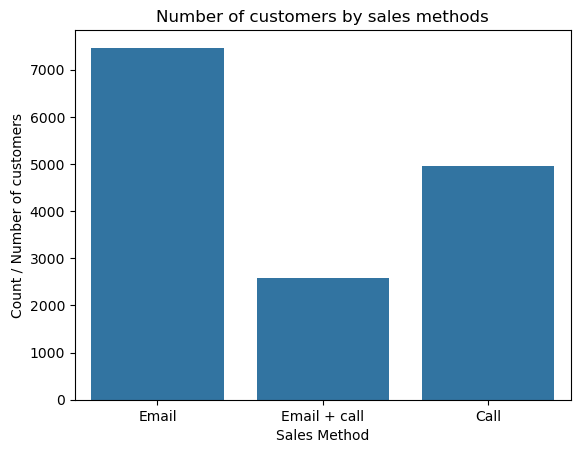

In [4]:
# How many customers were there for each approach?
sns.countplot (x='clean_sales_meth', data = product_sales_new)
plt.title('Number of customers by sales methods')
plt.xlabel('Sales Method')
plt.ylabel('Count / Number of customers')
plt.show()

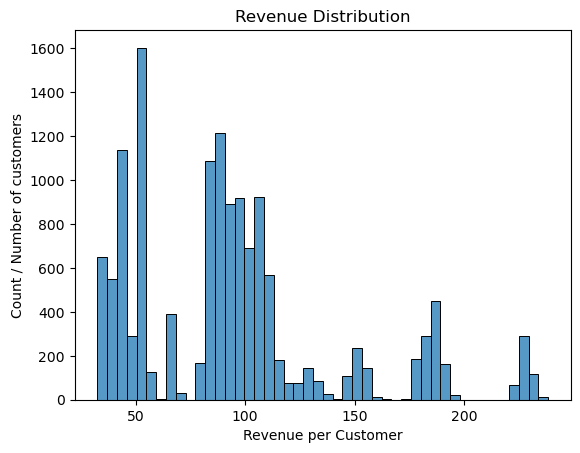

' The majority of products sold last 6 weeks are less than 200 USD. Products sold for more than 200 USD could be considered outliers.'

In [5]:
# What does the spread of revenue look like overall? 
sns.histplot (data = product_sales_new, x='revenue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue per Customer')
plt.ylabel('Count / Number of customers')
plt.show()
''' The majority of products sold last 6 weeks are less than 200 USD. Products sold for more than 200 USD could be considered outliers.'''

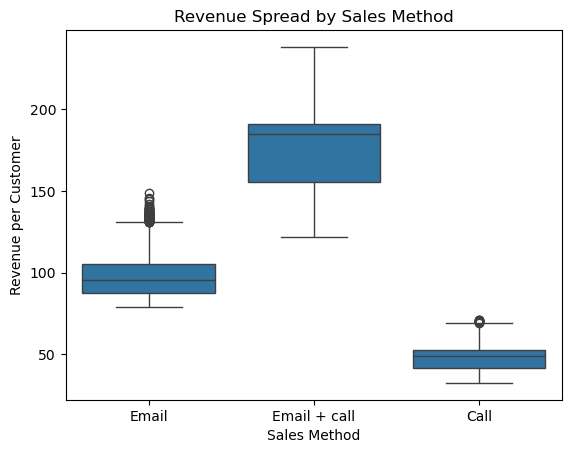

' From the box plots below, we can see that the Email + call approach has the highest revenue, ranging from about 170 to 190 USD per sale. Emailing is also quite effective, with most of its sales varying around 90 to well over 100 USD. There are a few sales that even make it to 150 USD, matching that of the Email + call methods. In contrast, the revenue from Call is significantly low, as it ranges from a bit over 50 USD down to 30 USD each sale.    '

In [6]:
# And for each method?
sns.boxplot(data=product_sales_new, x='clean_sales_meth', y='revenue')
plt.title('Revenue Spread by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue per Customer')
plt.show()

''' From the box plots below, we can see that the Email + call approach has the highest revenue, ranging from about 170 to 190 USD per sale. Emailing is also quite effective, with most of its sales varying around 90 to well over 100 USD. There are a few sales that even make it to 150 USD, matching that of the Email + call methods. In contrast, the revenue from Call is significantly low, as it ranges from a bit over 50 USD down to 30 USD each sale.    '''

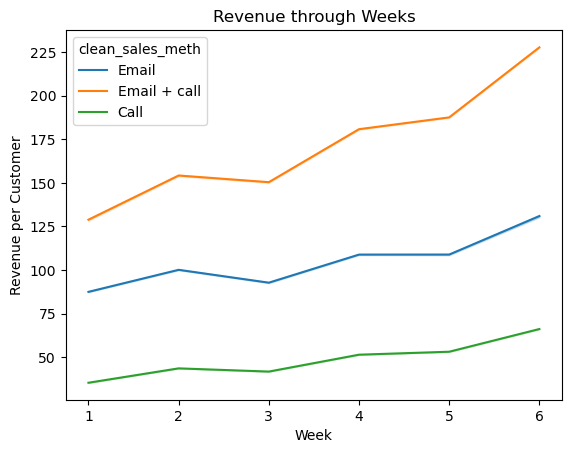

' There is a clear upward trend in all sales approaches as the weeks went by. Starting from around 125 USD, the revenue of Email + call almost doubled at the end of the period, with 225 USD per sale. The other sales method also witnessed an increase in revenue of approximately 15 USD from week 1 to week 6 '

In [7]:
# Was there any difference in revenue over time for each of the methods?

sns.lineplot (x = 'week', y = 'revenue', hue='clean_sales_meth', data = product_sales_new)
plt.title('Revenue through Weeks')
plt.xlabel('Week')
plt.ylabel('Revenue per Customer')
plt.show()

''' There is a clear upward trend in all sales approaches as the weeks went by. Starting from around 125 USD, the revenue of Email + call almost doubled at the end of the period, with 225 USD per sale. The other sales method also witnessed an increase in revenue of approximately 15 USD from week 1 to week 6 '''

clean_sales_meth
Call            0.164926
Email           0.505264
Email + call    0.329810
Name: clean_rev, dtype: float64


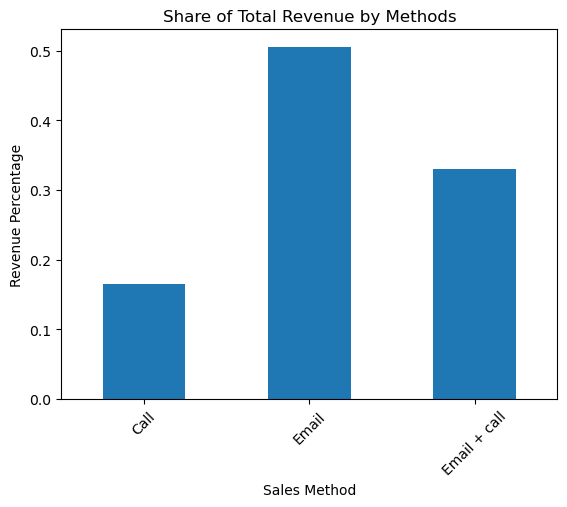

In [8]:
product_sales_new.head(10)
total_rev_by_method = product_sales_new.groupby('clean_sales_meth')['clean_rev'].sum()
total_rev_proportion = total_rev_by_method/total_rev_by_method.sum()
print (total_rev_proportion)

total_rev_proportion.plot (x = 'clean_sales_meth', kind = 'bar')
plt.title('Share of Total Revenue by Methods')
plt.xlabel('Sales Method')
plt.ylabel('Revenue Percentage')
plt.xticks(rotation = 45)
plt.show()